# PMR3201 Computação para Automação - V2023
## EP2 - Árvores k-d


## Deadline: 26/06/2023 23h59m


### Nome: Antônio Augusto Carnevalli
### NUSP: 13682909

## Código base

In [1]:
import math
import matplotlib.pyplot as plt

In [132]:
# Tarefa 1
def ha_interseccao(minxa, maxxa, minya, maxya, minxb, maxxb, minyb, maxyb):
    inter = True

    # Caso de retângulos externos
    if maxxa < minxb or maxxb < minxa:
        inter = False
    if maxya < minyb or maxyb < minya:
        inter = False

    # Caso de retângulos internos
    if (maxxb < maxxa and minxb > minxa and maxyb < maxya and minyb > minya):
        inter = False
    if (maxxa < maxxb and minxa > minxb and maxya < maxyb and minya > minyb):
        inter = False

    return inter


# Tarefa 3
global qte
qte = 0
def int_circ_rect(minx, maxx, miny, maxy, cx, cy, r2):
    from math import sqrt
    global qte
    qte+=1
    # Definindo o centro do retângulo e suas medidas
    largura = maxx - minx
    altura = maxy - miny
    centro_rectX = (maxx + (minx))/2
    centro_rectY = (maxy + (miny))/2


    # Definindo o a distância do centro da circunferência até o centro do retângulo
    distCX = abs(cx - centro_rectX);
    distCY = abs(cy - centro_rectY);


    #print(largura, altura, centro_rectX, centro_rectY, distCX, distCY)
    if (distCX > (largura/2 + sqrt(r2))):
       return False
    if (distCY > (altura/2 +  sqrt(r2))):
       return False

    if (distCX <= (largura/2)):
       return True
    if (distCY <= (altura/2)):
       return True

    dist_centro_ret = (distCX - largura/2)**2 + (distCY - altura/2)**2

    # Verifica se há intersecção
    return (dist_centro_ret <= (r2))


# Tarefas 2 e 4
class NoArvore2D:
  """ Implementa um nó de árvore 2d (k-d bidimensional)
  """
  def __init__(self, x, y):
    """ Cria um novo nó. x e y são as coordenadas do nó.
    """
    self._x = x       # Coordenada x
    self._y = y       # Coordenada y
    self._e = None    # Sub-árvore esquerda
    self._d = None    # Sub-árvore direita
  # Este é o método recursivo que faz a inserção de um novo nó
  #  Ele é chamada pelo método insere
  def _insere_rec(self, x, y, horizontal):
    if (horizontal and self._x > x) or ((not horizontal) and self._y > y):
      if self._e is None:
        self._e = NoArvore2D(x, y)
      else:
        self._e._insere_rec(x, y, not horizontal)
    else:
      if self._d is None:
        self._d = NoArvore2D(x, y)
      else:
        self._d._insere_rec(x, y, not horizontal)

  def insere(self, x, y):
    """ Insere um novo nó. x e y são as coordenadas do nó a ser inserido na
    árvore."""
    self._insere_rec(x, y, True)

  # Tarefa 4
  # Seguiremos o passo a passo elaborado no enunciado
  def _busca_mais_proximo_rec(self, x, y, maisprox_x, maisprox_y, r2, limmx, limsx, limiy, limsy, horizontal):
    # Mostra qual ponto está atualmente sendo visitado e aumenta a quantidade
    # de vezes que a função int_circ_rect é chamada
    #print(self._x, self._y)
    # 1
    # Calculando a distancia e verificando se haverá substituição
    dist = (self._x - x)**2 + (self._y - y)**2
    if dist < r2:
      maisprox_x = self._x
      maisprox_y = self._y
      r2 = dist

    # 2 e 3
    # Verificando qual sub-árvore será a distante e qual será a próxima,
    # e verificando as suas intersecções com as próximas
    if horizontal:
      if x > self._x and self._d:

        if int_circ_rect(self._x, limsx, limiy, limsy, x, y, r2):
          maisprox_x, maisprox_y, r2= self._d._busca_mais_proximo_rec(x, y, maisprox_x, maisprox_y, r2, self._x, limsx, limiy, limsy, not horizontal)
      elif self._e and x < self._x:

        if int_circ_rect(limmx, self._x, limiy, limsy, x, y, r2):
          maisprox_x, maisprox_y, r2 = self._e._busca_mais_proximo_rec(x, y, maisprox_x, maisprox_y, r2, limmx, self._x, limiy, limsy, not horizontal)
    else:
      if y > self._y and self._d:

        if int_circ_rect(limmx, limsx, self._y, limsy, x, y, r2):
          maisprox_x, maisprox_y, r2= self._d._busca_mais_proximo_rec(x, y, maisprox_x, maisprox_y, r2, limmx, limsx, self._y, limsy, not horizontal)
      elif self._e and y < self._y:

        if int_circ_rect(limmx, limsx, limiy, self._y, x, y, r2):
          maisprox_x, maisprox_y, r2 = self._e._busca_mais_proximo_rec(x, y, maisprox_x, maisprox_y, r2, limmx, limsx, limiy, self._y, not horizontal)


    # 4
    # Repetindo para as árvores distantes
    if horizontal:
      if x > self._x and self._e:
        if int_circ_rect(limmx, self._x, limiy, limsy, x, y, r2):
          maisprox_x, maisprox_y, r2 = self._e._busca_mais_proximo_rec(x, y, maisprox_x, maisprox_y, r2, self._x, limsx, limiy, limsy, not horizontal)
      elif self._d and x < self._x:

        if int_circ_rect(self._x, limsx, limiy, limsy, x, y, r2):
          maisprox_x, maisprox_y, r2 = self._d._busca_mais_proximo_rec(x, y, maisprox_x, maisprox_y, r2, limmx, self._x, limiy, limsy, not horizontal)

    else:
      if y > self._y and self._e:

        if int_circ_rect(limmx, limsx, limiy, self._y, x, y, r2):
          maisprox_x, maisprox_y, r2 = self._e._busca_mais_proximo_rec(x, y, maisprox_x, maisprox_y, r2, limmx, limsx, self._y, limsy, not horizontal)
      elif self._d and y < self._y:

        if int_circ_rect(limmx, limsx, self._y, limsy, x, y, r2):
          maisprox_x, maisprox_y, r2 = self._d._busca_mais_proximo_rec(x, y, maisprox_x, maisprox_y, r2, limmx, limsx, limiy, self._y, not horizontal)

    # 5 Devolvendo os valores.
    return maisprox_x, maisprox_y, r2

  def busca_mais_proximo(self, x, y):
    # Conta a quantidade de chamadas da função int_circ_rect
    # Conta a quantidade de vezes que a função int_circ_rect é chamada
    global qte
    qte = 0
    return self._busca_mais_proximo_rec(x, y, math.inf, math.inf, math.inf, -math.inf, math.inf, -math.inf, math.inf, True)


  #################################
  # Tarefa 2
  def _procura_rect_recur(self, minx, maxx, miny, maxy, func, pontos, horizontal):
    # Recebe as coordenadas do retângulo e os limites das coordenadas
    if (self._x >= minx and self._x <= maxx) and (self._y >= miny and self._y <= maxy):
      func(self._x, self._y, pontos)

    # Verificando qual eixo está sendo comparado
    if horizontal:
      # Se a coordenada X dos nós em diante forem menores que o limite mínimo do retângulo na coordenada X,
      # todos os demais também não estarão nos limites
      if self._e and self._e._x >= minx:
        self._e._procura_rect_recur(minx, maxx, miny, maxy, func, pontos, not horizontal)
      # Mesma ideia, se forem maiores que o limite superior do retângulo em X, os demais nós também serão
      if self._d and self._d._x <= maxx:
        self._d._procura_rect_recur(minx, maxx, miny, maxy, func, pontos, not horizontal)

    else:
      # Repetindo o processo para Y
      if self._e and self._e._y >= miny:
        self._e._procura_rect_recur(minx, maxx, miny, maxy, func, pontos, not horizontal)
      if self._d and self._d._y <= maxy:
        self._d._procura_rect_recur(minx, maxx, miny, maxy, func, pontos, not horizontal)


  def procura_rect(self, minx, maxx, miny, maxy, func):
    # Função que verifica quais pontos de uma árvore estão dentro de um retângulo delimitado
    # Se caminha-se para esquerda, altera-se o limite superior do eixo (X ou Y) comparado
    # Se caminhamos para a direita, alteramos o limite inferior do eixo comparado
    # Logo, uma solução consiste em percorrer a árvore e analisar os limites de cada sub-árvore
    # E realizaremos a checkagem de pontos em comum apenas nas sub-árvores que estão dentro do
    # Intervalo dos limites
    # Inicializaremos como True pois a primeira comparação é sempre em X
    pontos = []
    return self._procura_rect_recur(minx, maxx, miny, maxy, func, pontos, True)


    #raise NotImplementedError()

  def _p_avr_prof_ant_rec(self, horizontal, minx, maxx, miny, maxy, func):
    # Coordenadas e Limites atuais do ponto observado
    func(horizontal, self._x, self._y, minx, maxx, miny, maxy)

    if horizontal:
      if self._e:
        self._e._p_avr_prof_ant_rec(False, minx, self._x, miny, maxy, func)
      if self._d:
        self._d._p_avr_prof_ant_rec(False, self._x, maxx, miny, maxy, func)
    else:
      if self._e:
        self._e._p_avr_prof_ant_rec(True, minx, maxx, miny, self._y, func)
      if self._d:
        self._d._p_avr_prof_ant_rec(True, minx, maxx, self._y, maxy, func)

  """ Percore a árvore em profundidade pré-ordem (pai antes dos filhos)
  Para cada nó invoca func(horizontal, x, y, minx, maxx, miny, maxy) onde
  horizontal é verdadeiro se a separação das sub-árvores ocorre no eixo x, falso caso contrário
  x e y são as coordenadas do nó e minx, maxx, miny, maxy são os limites do nó"""
  def percorre_arvore_profundidade_anterior(self, func):
    return self._p_avr_prof_ant_rec(True, -math.inf, math.inf, -math.inf, math.inf, func)


## Exemplo:

In [133]:
def mostra_arvore(ax, raiz):
  def desenha_no(horizontal, x, y, minx, maxx, miny, maxy):
    maxx = min(maxx,10)
    maxy = min(maxy,10)
    minx = max(minx,-10)
    miny = max(miny,-10)
    if horizontal:
      ax.plot([x, x], [miny, maxy], color='r', ls='--', lw=0.5)
    else:
      ax.plot([minx, maxx], [y, y], color='b', ls='--', lw=0.5)
    ax.plot(x, y, ls=None, marker='o', color='k')
  raiz.percorre_arvore_profundidade_anterior(desenha_no)

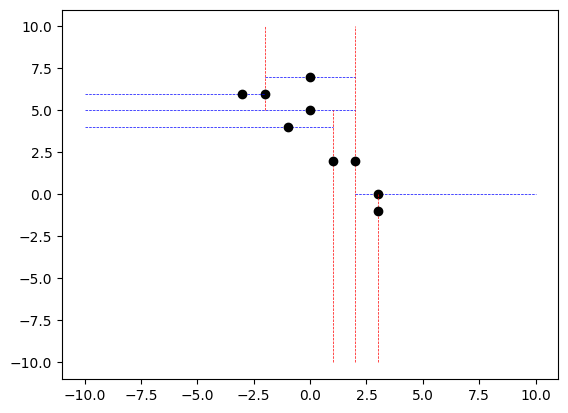

In [134]:
nos = [(2,2),\
       (0,5),\
       (3,0),\
       (1,2),\
       (-2,6),\
       (3,-1),\
       (-1,4),\
       (-3,6),\
       (0,7)]

t = NoArvore2D(*nos[0])
for i in range(1,len(nos)):
  t.insere(*nos[i])

fig, ax = plt.subplots()
mostra_arvore(ax, t)


## Tarefa 1

In [135]:
# Teste da Tarefa 1
rets = [[(-3, 1),(0, 2)],[(1, 3),(1, 3)]]
print(ha_interseccao(rets[0][0][0], rets[0][0][1], rets[0][1][0], rets[0][1][1], rets[1][0][0], rets[1][0][1], rets[1][1][0], rets[1][1][1]))

True


## Tarefa 2

In [136]:
# Função que armazena a lista de pontos encontrados
def achou_pontos(x, y, pontos):
  pontos.append((x, y))
  print(pontos)
  return

# Teste da Tarefa 2
nos1 = [(2,2),\
       (0,5),\
       (3,0),\
       (1,2),\
       (-2,6),\
       (3,-1),\
       (-1,4),\
       (-3,6),\
       (0,7)]

t1 = NoArvore2D(*nos1[0])
for i in range(1,len(nos1)):
  t1.insere(*nos1[i])
ret = [(-3, 1), (0, 2)]
t1.procura_rect(ret[0][0], ret[0][1], ret[1][0], ret[1][1], achou_pontos)

[(1, 2)]


## Tarefa 3

In [137]:
# Testes da Tarefa 3
print(int_circ_rect(-3, 1, 0, 2, 0, -1, 4))
print(int_circ_rect(0, 1, 0, 1, 2, 2, 2))
print(int_circ_rect(-5, 5, 0, 1, 0, 4, 25))
print(int_circ_rect(-5, 5, 0, 5, 0, 2, 1))
print(int_circ_rect(-1, 1, -1, 1, 0, 0, 9))
print(int_circ_rect(-3, -1, -3, -1, 2, 2, 16))
print(int_circ_rect(3, 4, -1, 1, 1, 0, 1))
print(int_circ_rect(-2, 2, -4, -3, -1, 0, 1))

True
True
True
True
True
False
False
False


## Tarefa 4

(1, 3, 5) 9
A média de chamadas para 10 nós foi de 8.3
A média de chamadas para 100 nós foi de 36.2
A média de chamadas para 1000 nós foi de 74.4
A média de chamadas para 10000 nós foi de 120.6


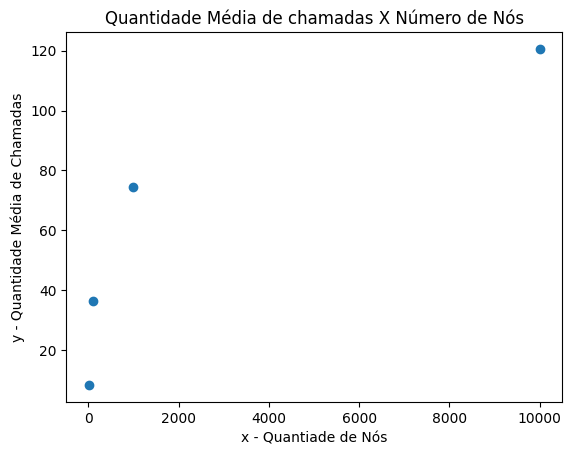

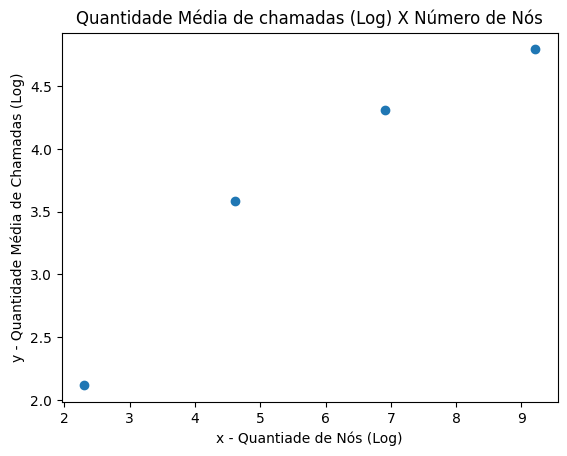

In [140]:
# Testes da Tarefa 4
nos2 = [(0,0),\
       (-3,2),\
       (3,3),\
       (-3,0),\
       (-6,5),\
       (1,3),\
       (2,5),\
       (-7,3),\
       (2,-1),\
       (3, 0)]

t2 = NoArvore2D(*nos2[0])
for i in range(1,len(nos2)):
  t2.insere(*nos2[i])
# Retorna a sequência de pontos visitados (se for removido o # em frente ao print
# da função_busca_mais_proximo_rec, tirei para melhorar a leitura do restante abaixo)
# e também os valores de X, Y, e distância ao quadrado do ponto mais próximo
# E por fim a quantidade de vezes que foi acionada a função int_circ_rect
print(t2.busca_mais_proximo(-1, 4), qte)


###########################################
# Teste do desempenho por quantidade de nós
import random

# Árvore de 10 nós
nos10 = []
i = 0
while i < 10:
  nos10.append((random.randint(-10, 10), random.randint(-10, 10)))
  i+=1

t10 = NoArvore2D(*nos10[0])
for i in range(1,len(nos10)):
  t10.insere(*nos10[i])

a = 0
soma = 0
while a < 10:
  t10.busca_mais_proximo(random.randint(-10, 10), random.randint(-10, 10))
  soma += qte
  a+=1
media1 = soma/10
print(f'A média de chamadas para 10 nós foi de {media1}')


# Árvore de 100 nós
nos100 = []
i = 0
while i < 100:
  nos100.append((random.randint(-10, 10), random.randint(-10, 10)))
  i+=1

t100 = NoArvore2D(*nos100[0])
for i in range(1,len(nos100)):
  t100.insere(*nos100[i])
a = 0
soma = 0
while a < 10:
  t100.busca_mais_proximo(random.randint(-10, 10), random.randint(-10, 10))
  soma += qte
  a+=1
media2 = soma/10
print(f'A média de chamadas para 100 nós foi de {media2}')

# Árvore de 1000 nós
nos1000 = []
i = 0
while i < 1000:
  # para mais de 400 pontos, devemos aumentar o intervalo, pois se não, haverá
  # um excesso de números repetidos, o que não é desejado em uma árvore
  nos1000.append((random.randint(-100, 100), random.randint(-100, 100)))
  i+=1

t1000 = NoArvore2D(*nos1000[0])
for i in range(1,len(nos1000)):
  t1000.insere(*nos1000[i])
a = 0
soma = 0
while a < 10:
  t1000.busca_mais_proximo(random.randint(-100, 100), random.randint(-100, 100))
  soma += qte
  a+=1
media3 = soma/10
print(f'A média de chamadas para 1000 nós foi de {media3}')

# Árvore de 10000 nós
nos10000 = []
i = 0
while i < 10000:
  nos10000.append((random.randint(-1000, 1000), random.randint(-1000, 1000)))
  i+=1

t10000 = NoArvore2D(*nos10000[0])
for i in range(1,len(nos10000)):
  t10000.insere(*nos10000[i])
a = 0
soma = 0
while a < 10:
  t10000.busca_mais_proximo(random.randint(-1000, 1000), random.randint(-1000, 1000))

  soma += qte
  a+=1
media4 = soma/10
print(f'A média de chamadas para 10000 nós foi de {media4}')

##############
# Plotando o gráfico normal
x = [10, 100, 1000, 10000]
y = [media1, media2, media3, media4]
plt.scatter(x, y)
plt.xlabel('x - Quantiade de Nós')
plt.ylabel('y - Quantidade Média de Chamadas')
plt.title('Quantidade Média de chamadas X Número de Nós')
plt.show()

##############
# Plotando o gráfico Logarítimo
x = [math.log(10), math.log(100), math.log(1000), math.log(10000)]
y = [math.log(media1), math.log(media2), math.log(media3), math.log(media4)]
plt.scatter(x, y)
plt.xlabel('x - Quantiade de Nós (Log)')
plt.ylabel('y - Quantidade Média de Chamadas (Log)')
plt.title('Quantidade Média de chamadas (Log) X Número de Nós')
plt.show()